# Análise do dataframe census

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plp

### Carga dos dados

In [9]:
dados = pd.read_csv('census.csv')

### Verificar os primeiros registros

In [11]:
dados.head()

,Unnamed: 0,age,workclass,final.weight,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loos,hour.per.week,native.country,income
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### consultar os nomes das colunas

In [12]:
dados.columns

Index(['Unnamed: 0', 'age', 'workclass', 'final.weight', 'education',
       'education.num', 'marital.status', 'occupation', 'relationship', 'race',
       'sex', 'capital.gain', 'capital.loos', 'hour.per.week',
       'native.country', 'income'],
      dtype='object')

### Retirar colunas desnecessárias

In [13]:
del dados['Unnamed: 0']
del dados['final.weight']
del dados['education.num']

In [14]:
dados.head()

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loos,hour.per.week,native.country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Distribuição dos dados

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f121052c780>,
      dtype=object)

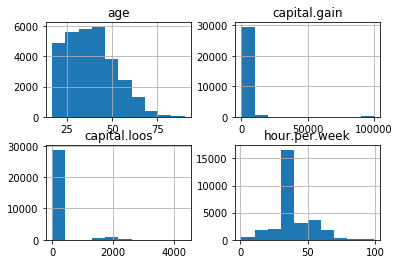

In [15]:
dados.hist()

### Consultar a quantidade de homens e mulheres

In [16]:
sexo = dados.groupby('sex')
sexo.size()

sex
 Female     9782
 Male      20380
dtype: int64

### Consultar a distribuição por cor

In [17]:
cor = dados.groupby('race')

In [18]:
cor.size()

race
 Amer-Indian-Eskimo      286
 Asian-Pac-Islander      895
 Black                  2817
 Other                   231
 White                 25933
dtype: int64

### Distribuição da escolaridade por sexo

In [19]:
edu = dados.groupby(['sex', 'education'])

In [20]:
edu.size()

sex      education    
 Female   10th             250
          11th             371
          12th             122
          1st-4th           43
          5th-6th           69
          7th-8th          132
          9th              119
          Assoc-acdm       395
          Assoc-voc        455
          Bachelors       1522
          Doctorate         81
          HS-grad         3106
          Masters          509
          Preschool         14
          Prof-school       87
          Some-college    2507
 Male     10th             570
          11th             677
          12th             255
          1st-4th          108
          5th-6th          219
          7th-8th          425
          9th              336
          Assoc-acdm       613
          Assoc-voc        852
          Bachelors       3522
          Doctorate        294
          HS-grad         6734
          Masters         1118
          Preschool         31
          Prof-school      455
          Some-c

### Distribuição de Renda por sexo

In [21]:
renda = dados.groupby(['sex', 'income'])
renda_ordenada = renda.size()
renda_ordenada.sort_values(ascending=False)

sex      income
 Male     <=50K    13984
 Female   <=50K     8670
 Male     >50K      6396
 Female   >50K      1112
dtype: int64

### Resumo estatístico

In [22]:
dados.describe()

,age,capital.gain,capital.loos,hour.per.week
count,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1092.007858,88.372489,40.931238
std,13.134665,7406.346497,404.298370,11.979984
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,47.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


### Medidas de Centralidade

In [23]:
idade = dict(dados['age'].describe())
idade['mediana'] = dados['age'].median()
idade['moda'] = list([i for i in dados['age'].mode()])
idade

{'25%': 28.0,
 '50%': 37.0,
 '75%': 47.0,
 'count': 30162.0,
 'max': 90.0,
 'mean': 38.437901995888865,
 'mediana': 37.0,
 'min': 17.0,
 'moda': [36],
 'std': 13.134664776856338}

In [24]:
renda = dict(dados['income'].describe())
renda['unique'] = dados['income'].unique()
renda

{'count': 30162,
 'freq': 22654,
 'top': ' <=50K',
 'unique': array([' <=50K', ' >50K'], dtype=object)}

### Mudando os index

In [25]:
df = dados.set_index('occupation')

In [26]:
df = df.groupby('occupation')

In [27]:
df.head()

,age,workclass,education,marital.status,relationship,race,sex,capital.gain,capital.loos,hour.per.week,native.country,income
occupation,,,,,,,,,,,,
Adm-clerical,39,State-gov,Bachelors,Never-married,Not-in-family,White,Male,2174,0,40,United-States,<=50K
Exec-managerial,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Husband,White,Male,0,0,13,United-States,<=50K
Handlers-cleaners,38,Private,HS-grad,Divorced,Not-in-family,White,Male,0,0,40,United-States,<=50K
Handlers-cleaners,53,Private,11th,Married-civ-spouse,Husband,Black,Male,0,0,40,United-States,<=50K
Prof-specialty,28,Private,Bachelors,Married-civ-spouse,Wife,Black,Female,0,0,40,Cuba,<=50K
Exec-managerial,37,Private,Masters,Married-civ-spouse,Wife,White,Female,0,0,40,United-States,<=50K
Other-service,49,Private,9th,Married-spouse-absent,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
Exec-managerial,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Husband,White,Male,0,0,45,United-States,>50K
Prof-specialty,31,Private,Masters,Never-married,Not-in-family,White,Female,14084,0,50,United-States,>50K
